In [46]:
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
c=['red','blue','green','black','lightgrey','cyan','orange']

In [47]:
def adjacency_matrix(X,sigma):
    W=np.zeros((X.shape[0],X.shape[0]))
    for i in range(0,X.shape[0]):
        for j in range(0,X.shape[0]):
            norm=np.square(np.linalg.norm(X[i]-X[j]))
            W[i][j]=np.exp(-norm/(2*sigma**2))
    return W

In [48]:
def Degree_matrix(X,sigma):
    W=adjacency_matrix(X,sigma)
    d=np.sum(W,axis=1)
    D=np.zeros((W.shape[0],W.shape[0]))
    for i in range(D.shape[0]):
        for j in range(D.shape[0]):
            if(i==j):
                D[i][j]=d[i]
    return D

In [60]:
def soln_f(X,sigma,k):
    D=Degree_matrix(X,sigma)
    W=adjacency_matrix(X,sigma)
    #print(D)
    D[np.diag_indices(D.shape[1])] = 1/ (D.diagonal()**0.5)
    L_new=np.dot((np.dot(D,W)),D)
    #print(L_new)
    eigen_vals, eigen_vectors = np.linalg.eig(L_new)
    idx = eigen_vals.real.argsort()[-k:eigen_vals.shape[0]]
    f=np.empty(shape=[L_new.shape[0],0])
    for i in range(0,k):
        #print(sort[i])
        #print("eigen:",eigen_vectors[:,eigen_vals==sort[i]])
        f=np.hstack((f,eigen_vectors[:,idx]))
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            f[i][j] = f[i][j]/np.linalg.norm(f[i]) 
    #print(f)
    return f

In [54]:
def Spectral_Clustering(X, random_state_=0,sigma=1,k=1,type_='k-means++',n_init_=10,max_iter_=300,tol_=1e-04):
    km=KMeans(n_clusters=k, init=type_,
                  n_init=n_init_, max_iter=max_iter_,
                  tol=tol_, random_state=random_state_)
    km.fit(soln_f(X,sigma,k))
    y_km=km.predict(soln_f(X,sigma,k))
    return y_km

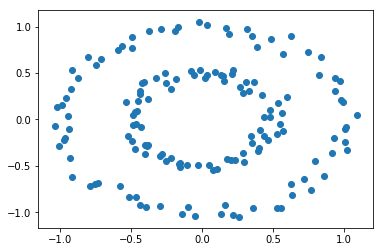

In [55]:
X,y = make_circles(n_samples=150, factor=.5,
                   noise=.05)
plt.scatter(X[:,0],X[:,1])
plt.show()

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


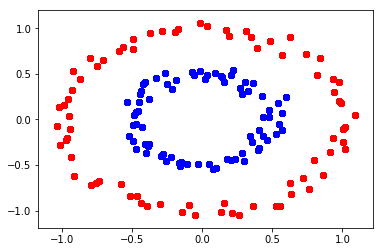

In [57]:
y_km=Spectral_Clustering(X,0,0.1,2)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()

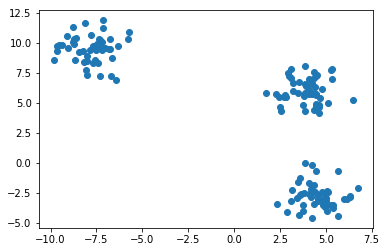

In [61]:
X,y = make_blobs(n_samples=150, random_state=47)
plt.scatter(X[:,0],X[:,1])

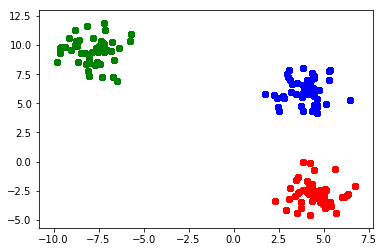

In [63]:
y_km=Spectral_Clustering(X,0,0.5,3)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()

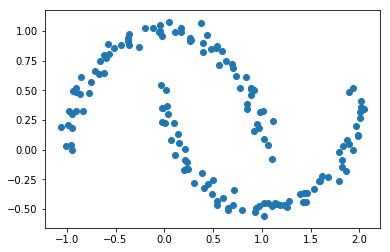

In [64]:
X,y = make_moons(n_samples=150,noise=.05)
plt.scatter(X[:,0],X[:,1])

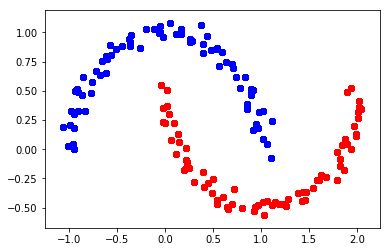

In [65]:
y_km=Spectral_Clustering(X,0,0.1,2)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()

In [13]:
filePath1 = "test1_data.txt"
X = np.loadtxt(filePath1, delimiter=" ")

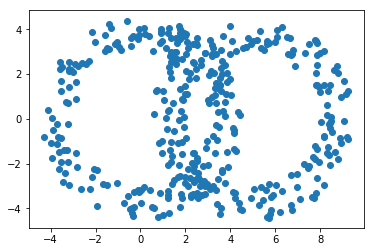

In [14]:
plt.scatter(X[:,0],X[:,1])

n_cluster: 3 pos2: 1.51 score: 0.4602473797583914


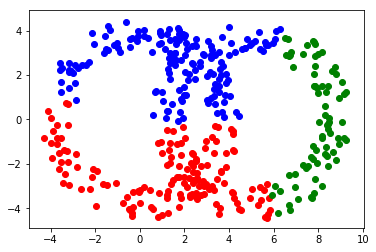

In [16]:
from sklearn.cluster import KMeans
score=10**6
k=range(3,4,1)
sigma=[]
x,y=0.01,2
while x<y:
    sigma.append(x)
    x+=0.5
for i in k:
    score=10**6
    for j in sigma:
        km=KMeans(n_clusters=i, init='k-means++',
                  n_init=10, max_iter=300000,
                  tol=1e-08, random_state=0)
        km.fit(soln_f(X,j,i))
        if(score>km.inertia_):
            score=km.inertia_
            pos1=i
            pos2=j
    print("n_cluster:",pos1,"pos2:",pos2,"score:",score)
    km=KMeans(n_clusters=pos1, init='k-means++',
                  n_init=10, max_iter=300,
                  tol=1e-08, random_state=0)
    km.fit(soln_f(X,pos2,pos1))
    y_km=km.predict(soln_f(X,pos2,pos1))
    for a in range(0,i):
        plt.scatter(X[y_km==a,0],X[y_km==a,1],c=c[a])
    plt.show()

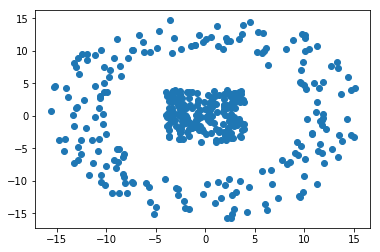

In [18]:
filePath2 = "test2_data.txt"
X = np.loadtxt(filePath2, delimiter=" ")
plt.scatter(X[:,0],X[:,1])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


n_cluster: 1 pos2: 4.8100000000000005 score: 0.09853702301204752


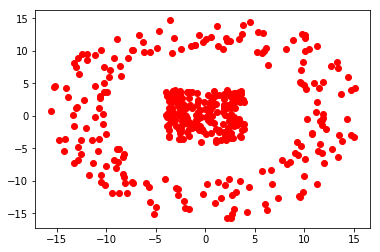

n_cluster: 2 pos2: 2.01 score: 0.030340877962683654


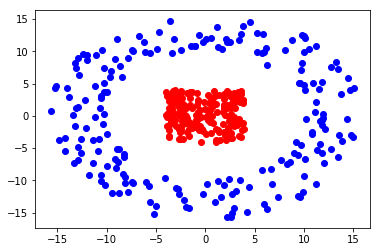

n_cluster: 3 pos2: 0.41000000000000003 score: 0.09026776328917943


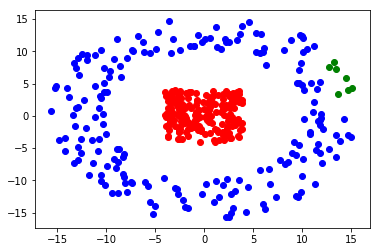

In [19]:
from sklearn.cluster import KMeans
score=10**6
k=range(1,4,1)
sigma=[]
x,y=0.01,5
while x<y:
    sigma.append(x)
    x+=0.4
for i in k:
    score=10**6
    for j in sigma:
        km=KMeans(n_clusters=i, init='k-means++',
                  n_init=10, max_iter=300,
                  tol=1e-04, random_state=0)
        km.fit(soln_f(X,j,i))
        if(score>km.inertia_):
            score=km.inertia_
            pos1=i
            pos2=j
    print("n_cluster:",pos1,"pos2:",pos2,"score:",score)
    km=KMeans(n_clusters=pos1, init='k-means++',
                  n_init=10, max_iter=300,
                  tol=1e-04, random_state=0)
    km.fit(soln_f(X,pos2,pos1))
    y_km=km.predict(soln_f(X,pos2,pos1))
    for a in range(0,i):
        plt.scatter(X[y_km==a,0],X[y_km==a,1],c=c[a])
    plt.show()

In [66]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

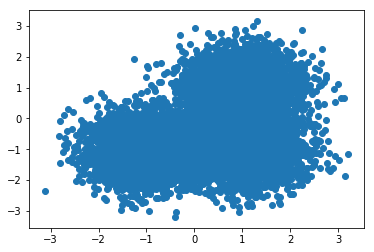

In [67]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
y_km=Spectral_Clustering(X,0,0.5,3)
for i in y_km:
    plt.scatter(X[y_km==i,0],X[y_km==i,1],c=c[i])
plt.show()